In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_edgelist = pd.read_csv('edgeList.csv')[:]
df_nodelist = pd.read_csv('nodeList.csv')[:]

In [3]:
df_nodelist.head()

,node_id,idCom,author
0,0,1,Y Kobayashi
1,1,2,A Gabrielli
2,2,4,A Babino
3,3,1,FWS Lima
4,4,1,RN Costa Filho


In [4]:
df_edgelist.head()

,source,target,weight
0,0,3,0.123091
1,0,4,0.123091
2,0,7,0.123091
3,0,13,0.123091
4,0,15,0.123091


In [5]:
P = nx.DiGraph(df_edgelist[:150])
Out= P.out_degree()
list_degree=list(Out) 
nodes , degree = map(list, zip(*list_degree)) 
print('degree: ', degree)
print('nodes: ', nodes)


degree:  [66, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nodes:  [0, 3, 4, 7, 13, 15, 16, 25, 32, 42, 48, 55, 57, 59, 62, 66, 71, 76, 83, 90, 93, 98, 99, 106, 107, 110, 111, 112, 116, 117, 121, 125, 130, 136, 137, 139, 142, 149, 152, 156, 159, 161, 166, 167, 170, 172, 174, 178, 179, 193, 200, 205, 207, 214, 219, 220, 224, 228, 234, 236, 240, 245, 246, 253, 255, 259, 260, 1, 6, 12, 14, 21, 24, 36, 45, 51, 54, 60, 61, 68, 74, 77, 84, 100, 104, 109, 120, 128, 143, 145, 146, 147, 157, 173, 184, 204, 212, 218, 223, 226, 227, 237, 238, 239, 251, 2, 5, 44, 65, 89, 150, 191, 192, 243, 8, 11, 17, 18, 26, 27, 28, 31, 33, 34, 38, 40, 41, 43]


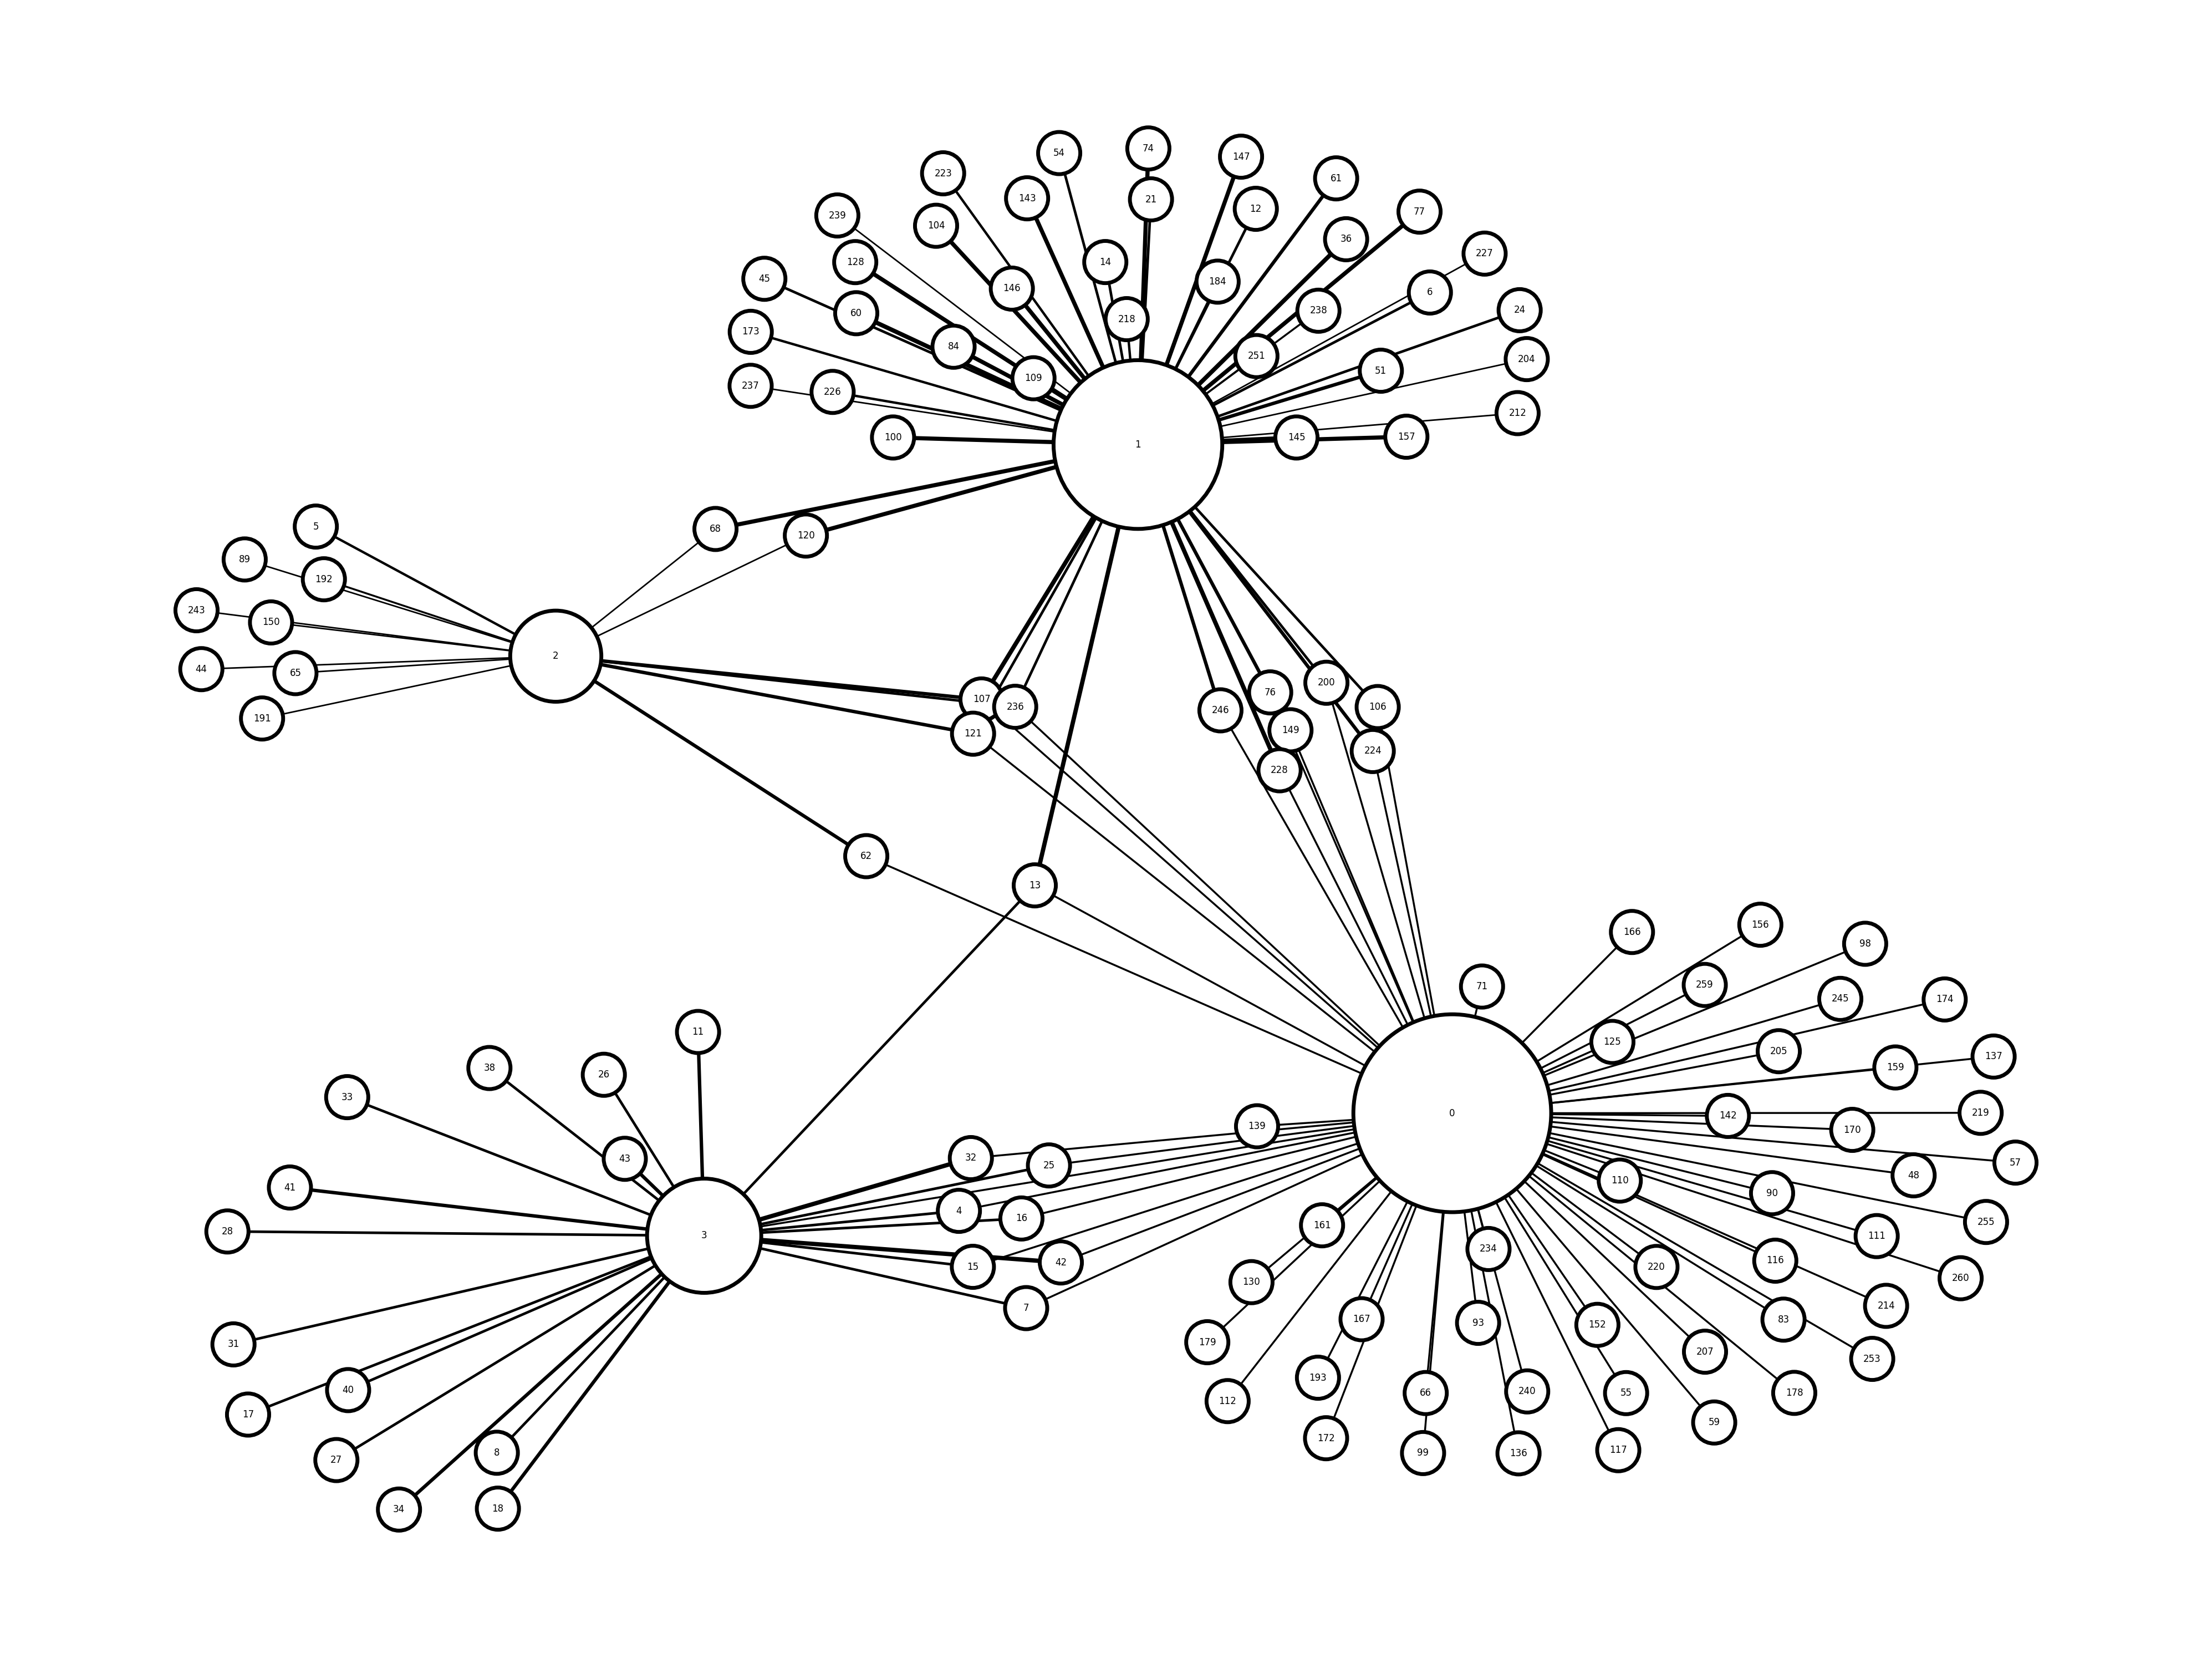

In [18]:
fig, ax = plt.subplots(figsize = (40, 30))
g = nx.from_pandas_edgelist(df_edgelist[:150], 'source', 'target', ['weight'])
pos = nx.spring_layout(g)  # position layout

nx.draw(g, pos,  with_labels=True, nodelist=nodes, node_size=[(v*1000 if v > 0 else 3000) for v in degree], node_color="white",edgecolors='black', linewidths=5, alpha=1 , width = df_edgelist['weight']*20)
ax.set_axis_off()
fig.tight_layout()
plt.show()

In [7]:
G = nx.from_pandas_edgelist(df_edgelist, 'source', 'target', ['weight'])
avg_neighbor_degree = nx.average_neighbor_degree(G)
print('avg_neighbor_degree: ', avg_neighbor_degree)


avg_neighbor_degree:  {0: 120.81818181818181, 3: 115.62142857142857, 4: 104.01242236024845, 7: 120.81818181818181, 13: 92.29383886255924, 15: 108.82666666666667, 16: 109.48701298701299, 25: 120.81818181818181, 32: 115.62142857142857, 42: 120.81818181818181, 48: 95.51269035532995, 55: 100.76162790697674, 57: 120.81818181818181, 59: 120.81818181818181, 62: 104.65030674846626, 66: 90.91666666666667, 71: 120.81818181818181, 76: 82.43442622950819, 83: 106.25, 90: 115.62142857142857, 93: 101.01923076923077, 98: 110.73469387755102, 99: 120.81818181818181, 106: 93.52450980392157, 107: 78.07692307692308, 110: 120.81818181818181, 111: 115.62142857142857, 112: 120.81818181818181, 116: 120.81818181818181, 117: 120.81818181818181, 121: 100.81502890173411, 125: 120.81818181818181, 130: 120.81818181818181, 136: 120.81818181818181, 137: 120.81818181818181, 139: 102.83333333333333, 142: 97.58333333333333, 149: 92.78155339805825, 152: 120.81818181818181, 156: 99.8313953488372, 159: 120.81818181818181, 1

In [8]:
DG = nx.DiGraph(df_edgelist)
Out_degrees = DG.out_degree()
print('Out_degrees: ', Out_degrees)




Out_degrees:  [(0, 66), (3, 139), (4, 159), (7, 63), (13, 201), (15, 143), (16, 146), (25, 59), (32, 124), (42, 57), (48, 166), (55, 137), (57, 54), (59, 53), (62, 127), (66, 115), (71, 50), (76, 173), (83, 114), (90, 92), (93, 72), (98, 91), (99, 44), (106, 126), (107, 153), (110, 41), (111, 82), (112, 39), (116, 38), (117, 37), (121, 94), (125, 35), (130, 34), (136, 33), (137, 32), (139, 55), (142, 94), (149, 92), (152, 28), (156, 73), (159, 26), (161, 25), (166, 24), (167, 57), (170, 22), (172, 34), (174, 20), (178, 44), (179, 18), (193, 17), (200, 26), (205, 15), (207, 30), (214, 13), (219, 12), (220, 22), (224, 26), (228, 13), (234, 9), (236, 22), (240, 6), (245, 11), (246, 10), (253, 6), (255, 2), (259, 1), (260, 0), (1, 48), (6, 34), (12, 33), (14, 19), (21, 49), (24, 30), (36, 29), (45, 28), (51, 18), (54, 27), (60, 26), (61, 25), (68, 30), (74, 23), (77, 21), (84, 100), (100, 46), (104, 19), (109, 35), (120, 102), (128, 16), (143, 15), (145, 88), (146, 27), (147, 13), (157, 24

In [9]:
df_Kiv = pd.DataFrame(list(avg_neighbor_degree.items()), columns=['Node', 'Avg_Neighbor_Degree'])
df_Ki = pd.DataFrame(Out_degrees, columns=['Node', 'Ki'])

In [19]:
df_Ks = df_Ki.merge(df_Kiv, on = 'Node')
df_Ks.head()

,Node,Ki,Avg_Neighbor_Degree
0,0,66,120.818182
1,3,139,115.621429
2,4,159,104.012422
3,7,63,120.818182
4,13,201,92.293839


(1, 1000)

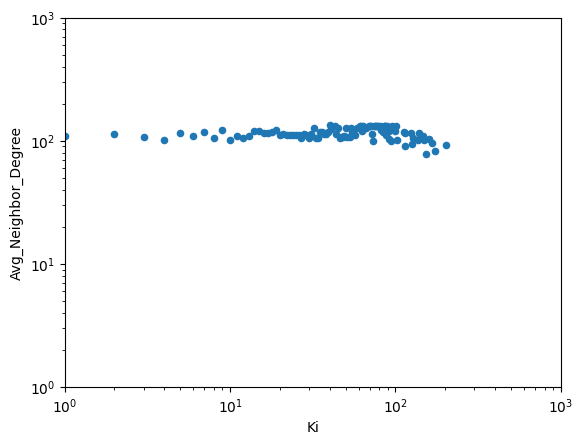

In [11]:
pd.DataFrame(df_Ks.groupby('Ki').Avg_Neighbor_Degree.mean()).reset_index().plot.scatter(x = 'Ki', y = 'Avg_Neighbor_Degree', loglog = True)
plt.ylim([1, 1000])
plt.xlim([1, 1000])

In [20]:
U = nx.path_graph(df_edgelist)
r = nx.degree_assortativity_coefficient(G, x='source', y='target')

print(f"{r:3.2f}")

-0.12
